<center>
<h1> <b>Programming Assignment-1</b> </h1>
<h3> <b>Name:</b> Shatansh Patnaik </h3>
<h3> <b>Roll No:</b> 20MA20067 </h3>
<h3> <b>Course:</b> Visual Computing with AI/ML </h3>
</center>

# Importing the essential libraries and frameworks for the assignment

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import sys, time

# Task-1: Color Space Conversion

In [2]:
def display_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [3]:
def convert_yuv_to_rgb(yuv_image):
    # First of all we extract all Y, U and V components from the given image
    Y = yuv_image[:, :, 0]
    U = yuv_image[:, :, 1]
    V = yuv_image[:, :, 2]

    # Next we ensure all the data types are float32
    Y = Y.astype(np.float32)
    U = U.astype(np.float32)
    V = V.astype(np.float32)

    height, width = Y.shape

    # Now we shall flatten the individual components
    Y = Y.reshape(-1)
    U = U.reshape(-1)
    V = V.reshape(-1)

    # Normalising Y and U values so as to avoid negative values
    V = V - 128
    U = U - 128

    # Utilising the conversion equations as specified in the matrix: [[1, 0, 1.13983], [1, -0.39465, -0.58060], [1, 2.03211, 0]]
    R = Y + 1.13983 * V
    G = Y - 0.39465 * U - 0.58060 * V
    B = Y + 2.03211 * U

    # Stacking the R, G, B segments into one array and then reshaping it into 3-channel image
    rgb_stack = np.stack([R, G, B], axis=1)
    rgb_stack = np.clip(rgb_stack, 0, 255).astype(np.uint8)
    rgb_image = rgb_stack.reshape((height, width, 3))
    
    return rgb_image

In [4]:
def convert_rgb_to_yCbCr(rgb_image):
    # Extracting the R, G and B components from the RGB image
    R = rgb_image[:, :, 0]
    G = rgb_image[:, :, 1]
    B = rgb_image[:, :, 2]

    # Next we ensure all the data types are float32
    R = R.astype(np.float32)
    G = G.astype(np.float32)
    B = B.astype(np.float32)
    
    height, width = R.shape

    # Now we shall flatten the individual components
    R = R.reshape(-1)
    G = G.reshape(-1)
    B = B.reshape(-1)

    # Conversion equations as obtained from the transformation matrix: [[0.299, 0.587, 0.114], [-0.168736, -0.331264, 0.5], [0.5, -0.418688, -0.081312]]
    Y_ = 0.299*R + 0.587*G + 0.114*B
    Cb = -0.168736*R - 0.331264*G + 0.5*B
    Cr = 0.5*R - 0.418688*G - 0.081312*B

    # Normalising the Cb and Cr components to obtain the positive values
    Cb = Cb + 128
    Cr = Cr + 128

    # Stacking the above obtained y, Cb, Cr so as to obtained 3-channel separated image
    yCbCr_stack = np.stack([Y_, Cr, Cb], axis=1)
    yCbCr_stack = np.clip(yCbCr_stack, 0, 255).astype(np.uint8)
    yCbCr_image = yCbCr_stack.reshape((height, width, 3))
    
    return yCbCr_image

## Reading the Task-1 image and obtaining the RGB image from the YUV image without using OpenCV

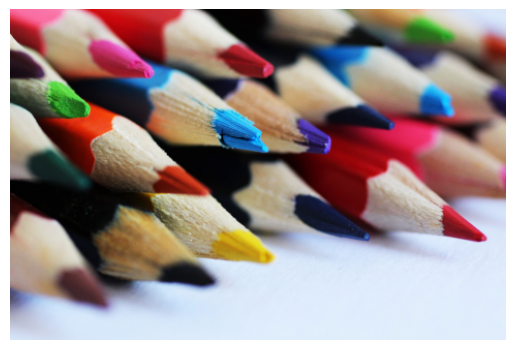

In [5]:
task_1_image = cv2.imread("./assignment_1_inputs/a_1_task_1.png")
rgb_img_converted = convert_yuv_to_rgb(task_1_image)
display_image(rgb_img_converted)

## Verification that the customly obtained image is in fact the RGB converted image of the given YUV image using OpenCV

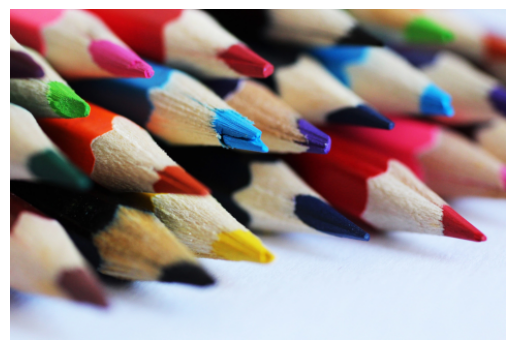

In [6]:
rgb_img = cv2.cvtColor(task_1_image, cv2.COLOR_YUV2RGB)
display_image(rgb_img)

## Converting the RGB channeled image to yCrCb channeled image

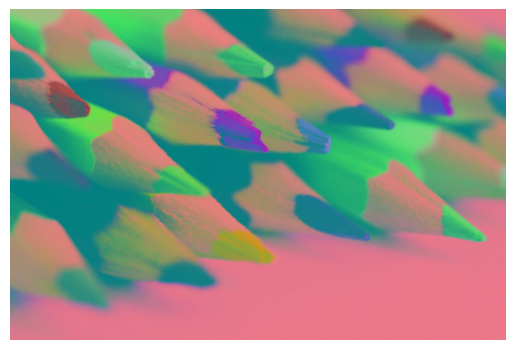

In [7]:
yCbCr_image = convert_rgb_to_yCbCr(rgb_img)
display_image(yCbCr_image)

## Verification that the customly obtained image is in fact the yCrCb converted image of the given YUV image using OpenCV

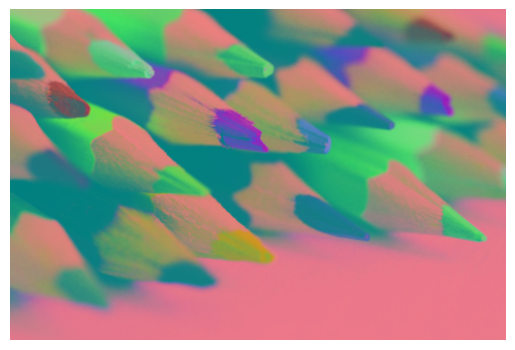

In [8]:
bgr_image = cv2.cvtColor(task_1_image, cv2.COLOR_YUV2BGR)
ycbcr_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2YCrCb)
display_image(ycbcr_image)

# Task-2: Logical Operation on Images

In [9]:
def get_xorified_image(first_img, second_img):
    h, w, d = first_img.shape
    resultant_img = np.zeros_like(first_img, dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            for k in range(d):
                resultant_img[i][j][k] = first_img[i][j][k] ^ second_img[i][j][k]

    return resultant_img

## Getting the XOR of two images without using builtin functions but by using the customly declared function

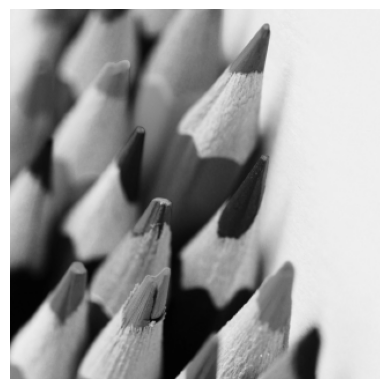

In [10]:
# Reading the two images
task_2_image_a = cv2.imread("./assignment_1_inputs/a_1_task_2_a.png")
task_2_image_b = cv2.imread("./assignment_1_inputs/a_1_task_2_b.png")

# Displaying the two images
display_image(task_2_image_a)

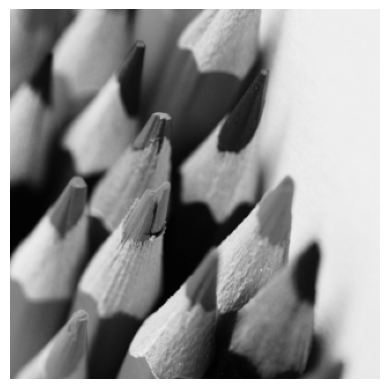

In [11]:
display_image(task_2_image_b)

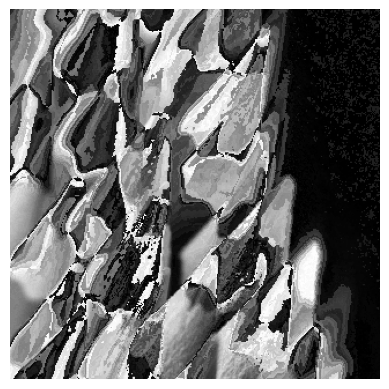

In [12]:
# Displaying the XORed image
xored_image = get_xorified_image(task_2_image_a, task_2_image_b)
display_image(xored_image)

## Verification of the manually obtained XORed image is indeed the XORed image using OpenCV

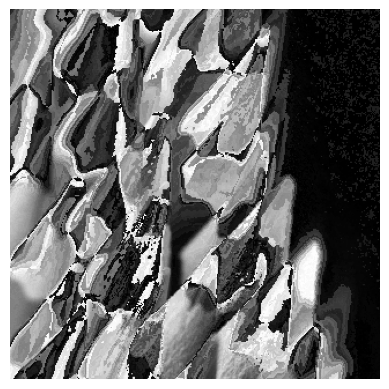

In [13]:
res_image = cv2.bitwise_xor(task_2_image_a, task_2_image_b)
display_image(res_image)

# Task-3: Image Rotation

In [14]:
def rotate_the_image(image, degrees):
    # Initially w eshall be converting the number of degrees to radians
    radians = math.radians(degrees)

    # In this case we shall assume that there is no change in size in the newly formed rotated image compared to the original
    rotated_image = np.uint8(np.zeros(image.shape))

    # Finding the dimensions of the image
    height, width, _ = rotated_image.shape

    # Finding the center of rotation
    cx, cy = (height//2, width//2)

    for i in range(height):
        for j in range(width):
            x = (i-cx)*math.cos(radians) + (j-cy)*math.sin(radians)
            y = -(i-cx)*math.sin(radians) + (j-cy)*math.cos(radians)

            # Rounding off the values obtained and shifting the center back
            x = round(x) + cx 
            y = round(y) + cy 

            if (x>=0 and y>=0 and x<height and  y<width):
                rotated_image[i,j,:] = image[x,y,:]

    return rotated_image 

In [15]:
def rotate_image_using_openCV(image, degrees):
    # Extracting the dimensions of the image
    height, width, _ = image.shape

    # Getting the center of the image
    cx = width//2
    cy = height//2

    # Building the rotation matrix using OpenCV
    rotation_matrix = cv2.getRotationMatrix2D((cx, cy), degrees, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    return rotated_image

## Rotating the images manually in angles of 45 degrees without using OpenCV

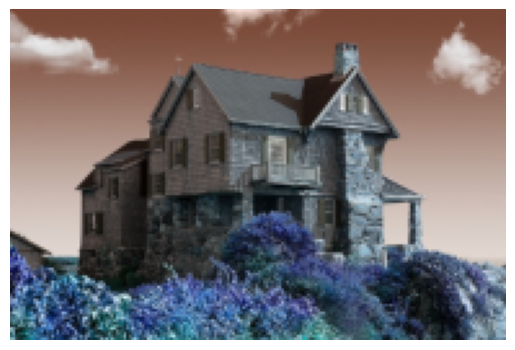

In [16]:
task_3_image = cv2.imread("./assignment_1_inputs/a_1_task_3.png")

rotated_0 = rotate_the_image(task_3_image, 0)
rotated_45 = rotate_the_image(task_3_image, 45)
rotated_90 = rotate_the_image(task_3_image, 90)
rotated_135 = rotate_the_image(task_3_image, 135)
rotated_180 = rotate_the_image(task_3_image, 180)

display_image(rotated_0)

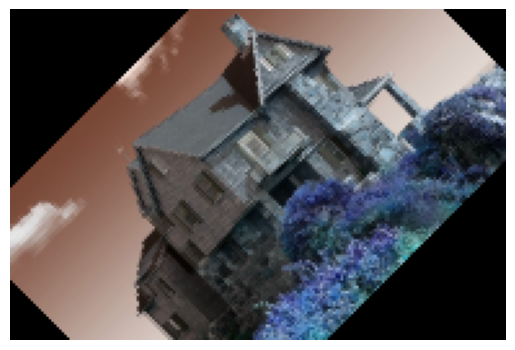

In [17]:
display_image(rotated_45)

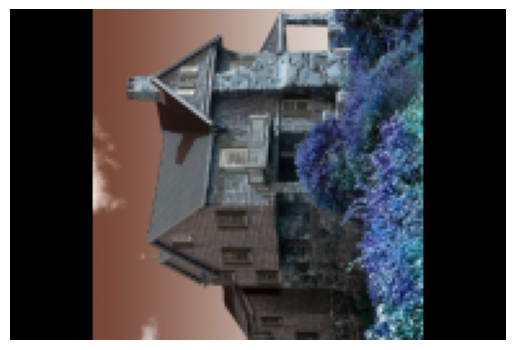

In [18]:
display_image(rotated_90)

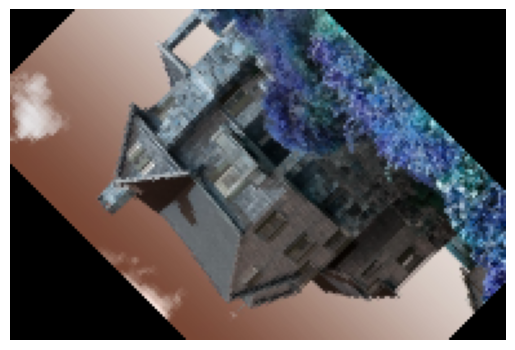

In [19]:
display_image(rotated_135)

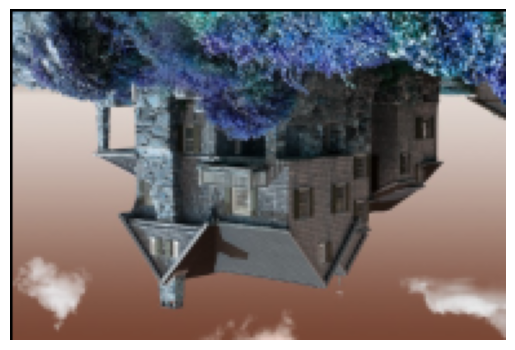

In [20]:
display_image(rotated_180)

## Verification of the rotation of the images using OpenCV

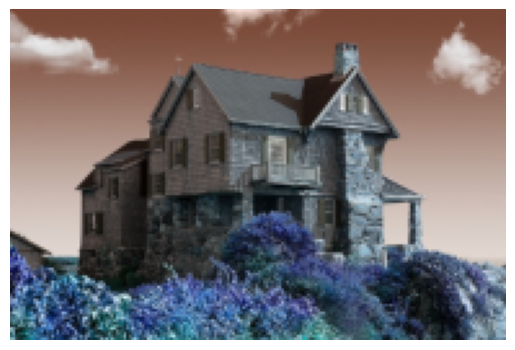

In [21]:
rotated_0_cv = rotate_image_using_openCV(task_3_image, 0)
rotated_45_cv = rotate_image_using_openCV(task_3_image, 45)
rotated_90_cv = rotate_image_using_openCV(task_3_image, 90)
rotated_135_cv = rotate_image_using_openCV(task_3_image, 135)
rotated_180_cv = rotate_image_using_openCV(task_3_image, 180)

display_image(rotated_0_cv)

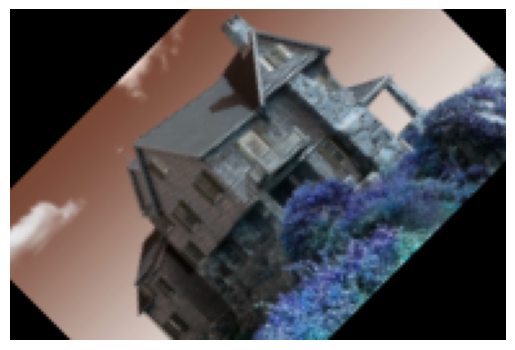

In [22]:
display_image(rotated_45_cv)

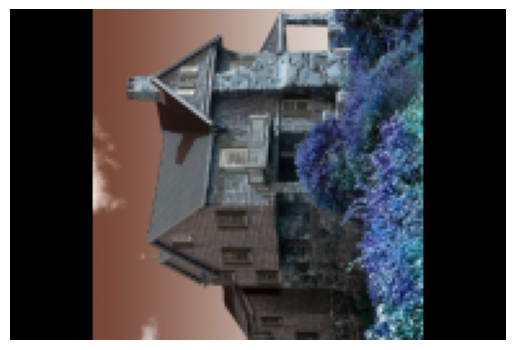

In [23]:
display_image(rotated_90_cv)

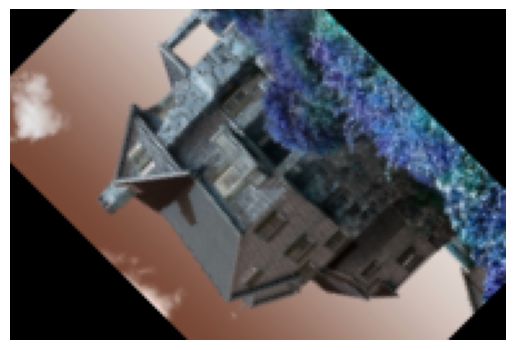

In [24]:
display_image(rotated_135_cv)

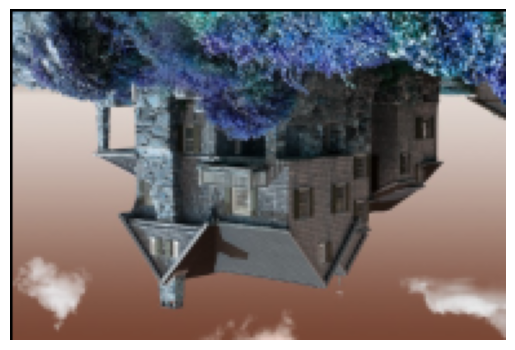

In [25]:
display_image(rotated_180_cv)

# Task-4: Bit Plane Slicing

In [26]:
def hide_plane(img_A, msb_plane, index):
    # Copying the given image
    img_A_prime = img_A[:,:]
    
    height, width = msb_plane.shape
    
    for i in range(height):
        for j in range(width):
            # If the bit is not set then we need to clear that bit of the img_A
            if msb_plane[i][j]==0:
                mask = ~(1<<index)
                mask = mask & 0xFF
                img_A_prime[i][j] = img_A_prime[i][j] & mask
            # We need to set the bit at index of img_A_prime if absent
            elif msb_plane[i][j]==1:
                mask = (1<<index)
                img_A_prime[i][j] = img_A_prime[i][j] | mask
                
    return img_A_prime

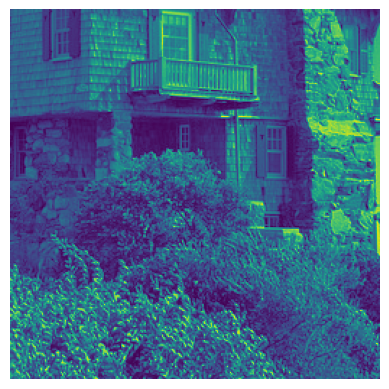

In [27]:
# Loading the images A and B
image_A = cv2.imread('./assignment_1_inputs/a_1_task_4_a.png')
image_B = cv2.imread('./assignment_1_inputs/a_1_task_4_b.png')

# Storing a copy so that we don't affect the original images
img_A = image_A[:,:,0]
img_B = image_B[:,:,0]

# Extracting the MSB Bit Plane of image B
msb_plane = (img_B >> 7) & 1

# Displaying image A, image B and the MSB Plane
display_image(img_A)

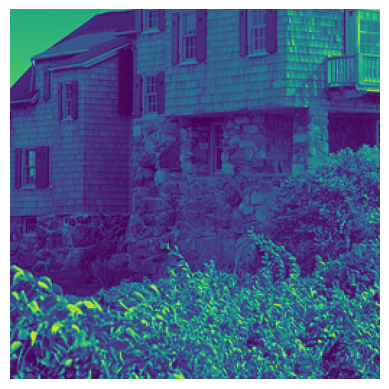

In [28]:
display_image(img_B)

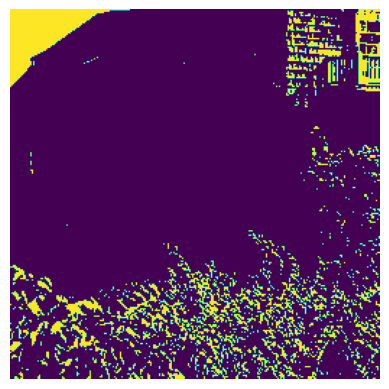

In [29]:
display_image(msb_plane)

## Here we are choosing the index as 0 or we are choosing the LSB of the image A ot be replaced by the most significant bit plane of image B

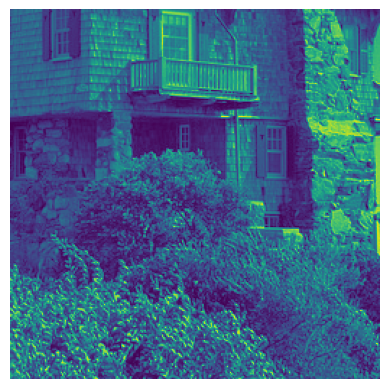

True

In [30]:
image_A_prime = hide_plane(img_A, msb_plane, 0)

display_image(image_A_prime)

# Saving the image
cv2.imwrite('20MA20067_Task4_output.png', image_A_prime)

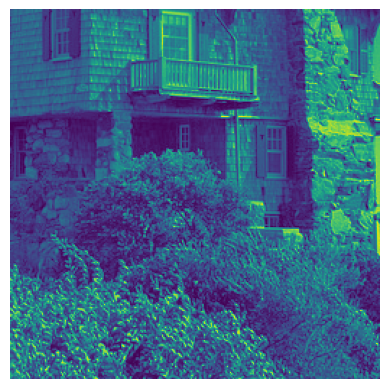

In [31]:
display_image(img_A)

## Justification for choosing the index as 0 or the least significant bit plane of the image A

In order to hide the MSB (Most Significant Bit) Plane of image B in one of the bit planes of image A such that the newly obtained image A_prime is visually identical to the previous image A, we have chosen the LSB (Least Significant Bit) such that we can hide there the MSB plane of image B.
 
For us, the human perception is least sensitive to changes in least significant bit planes because if LSB of x is 1, and LSB of LSB of x-1 will be 0 (provided both x and x-1 are non negative), thus the changes in the pixel values is not much significant to the human eye. Thus, by hiding the MSB of image B in the LSB of image A, we are making changes in the least noticeable part of image A, thereby ensuring that the visual appearance of A remains largely unchanged for the human eye.

# Task-5: Bicubic Interpolation

In [32]:
# For completing this task we need to first define an interpolation kernel, let the variable be x and the co-efficient be a
def kernel_interpolation_function(x, c):
    abs_x = abs(x)
    
    if abs_x >= 0 and abs_x <= 1: 
        return (c+2)*(abs_x**3)-(c+3)*(abs_x**2) + 1
        
    elif abs_x > 1 and abs_x <= 2: 
        return c*(abs_x**3) - (5*c)*(abs_x**2) + (8*c)*abs_x - 4*c 
    
    else:    
        return 0

In [33]:
def display_both_images(image, scaled_up_image):
    height1, width1, _ = image.shape
    height2, width2, _ = scaled_up_image.shape
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(image)
    axs[0].set_title(f'Original Image ({width1}x{height1})')
    axs[0].axis('off')
    
    axs[0].set_aspect(width1/height1)
    
    axs[1].imshow(scaled_up_image)
    axs[1].set_title(f'Upscaled Image ({width2}x{height2})')
    axs[1].axis('off')
    
    axs[1].set_aspect(width2/height2)
    
    plt.tight_layout()
    
    plt.show()

In [34]:
def perform_padding(img, height, width, depth): 
    new_img = np.zeros((height+4, width+4, depth)) 
    new_img[2 : height+2, 2 : width+2, : depth] = img 
      
    # Here we shall be padding the first and the last row
    new_img[2 : height+2, 0 : 2, :depth] = img[:, 0 : 1, :depth] 
    new_img[height+2 : height+4, 2 : width+2, :] = img[height-1 : height, :, :] 
    new_img[2 : height+2, width+2 : width+4, :] = img[:, width-1 : width, :] 
    new_img[0 : 2, 2 : width+2, :depth] = img[0 : 1, :, :depth] 
      
    # Now we shall be pad the missing points 
    new_img[0:2, 0:2, :depth] = img[0, 0, :depth] 
    new_img[height+2 : height+4, 0 : 2, :depth] = img[height-1, 0, :depth] 
    new_img[height+2 : height+4, width+2 : width+4, :depth] = img[height-1, width-1, :depth] 
    new_img[0:2, width+2:width+4, :depth] = img[0, width-1, :depth] 
      
    return new_img

In [35]:
def perform_bicubic_interpolation(image, scaling_factor, a):
    # We get the dimensions of the image
    height, width, depth = image.shape 

    # We perform padding on the image
    image = perform_padding(image, height, width, depth) 

    # We get the new heights and widths of the image 
    del_height = math.floor(height*scaling_factor) 
    del_width = math.floor(width*scaling_factor) 

    # We initiate the new scaled_image which will be the scaled up version of the input image
    scaled_image = np.zeros((del_height, del_width, 3)) 
  
    h = 1/scaling_factor 

    for c in range(depth): 
        for j in range(del_height): 
            for i in range(del_width): 
                x = i*h + 2 
                y = j*h + 2
  
                x_1 = x - math.floor(x) + 1
                x_2 = x - math.floor(x) 
                x_3 = math.floor(x) - x + 1 
                x_4 = math.floor(x) - x + 2 
  
                y_1 = y - math.floor(y) + 1 
                y_2 = y - math.floor(y) 
                y_3 = math.floor(y) - y + 1 
                y_4 = math.floor(y) - y + 2 

                # Now we shall create a horizontal kernel weight matrix
                matrix_1 = np.matrix([[kernel_interpolation_function(x_1, a), 
                                    kernel_interpolation_function(x_2, a), 
                                    kernel_interpolation_function(x_3, a), 
                                    kernel_interpolation_function(x_4, a)]]) 

                # Now we shall assemble the surrounding pixel block from the original image for interpolation
                matrix_2 = np.matrix([[image[int(y-y_1), int(x-x_1), c], 
                                    image[int(y-y_2), int(x-x_1), c], 
                                    image[int(y+y_3), int(x-x_1), c], 
                                    image[int(y+y_4), int(x-x_1), c]], 
                                   [image[int(y-y_1), int(x-x_2), c], 
                                    image[int(y-y_2), int(x-x_2), c], 
                                    image[int(y+y_3), int(x-x_2), c], 
                                    image[int(y+y_4), int(x-x_2), c]], 
                                   [image[int(y-y_1), int(x+x_3), c], 
                                    image[int(y-y_2), int(x+x_3), c], 
                                    image[int(y+y_3), int(x+x_3), c], 
                                    image[int(y+y_4), int(x+x_3), c]], 
                                   [image[int(y-y_1), int(x+x_4), c], 
                                    image[int(y-y_2), int(x+x_4), c], 
                                    image[int(y+y_3), int(x+x_4), c], 
                                    image[int(y+y_4), int(x+x_4), c]]]) 
               
                # Now we shall create a vertical kernel weight matrix 
                matrix_3 = np.matrix( 
                    [[kernel_interpolation_function(y_1, a)], 
                     [kernel_interpolation_function(y_2, a)], 
                     [kernel_interpolation_function(y_3, a)], 
                     [kernel_interpolation_function(y_4, a)]]) 
                
                # We now compute the final interpolated pixel value by performing dot product over matrices  
                scaled_image[j, i, c] = np.dot(np.dot(matrix_1, matrix_2), matrix_3).item()
  
    return scaled_image

In [36]:
# Reading the image
image = cv2.imread('./assignment_1_inputs/a_1_task_5.png') 

scaling_factor = 4
coefficient = -1/5
scaled_up_image = perform_bicubic_interpolation(image, scaling_factor, coefficient)  
scaled_up_image = np.clip(scaled_up_image, 0, 255)
scaled_up_image = scaled_up_image.astype(np.uint8)

## Displaying the images to notice the change

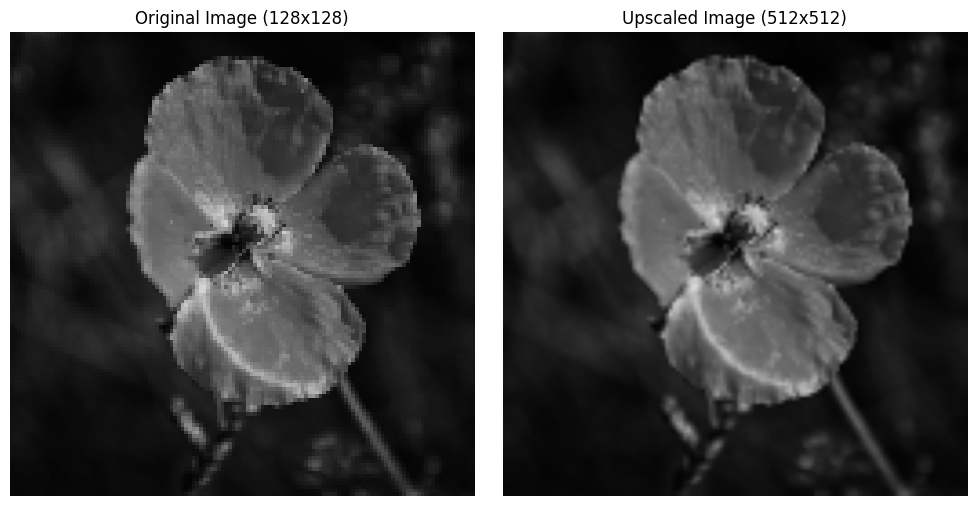

In [37]:
display_both_images(image, scaled_up_image)

## Verfication by observing the change in the size

In [38]:
print(scaled_up_image.shape)
print(image.shape)

(512, 512, 3)
(128, 128, 3)


## Verification by using OpenCV

In [39]:
del_height = int(image.shape[0] * 4)
del_width = int(image.shape[1] * 4)

new_dims = (del_width, del_height)

scaled_up_image_using_openCV = cv2.resize(image, new_dims, interpolation=cv2.INTER_CUBIC)

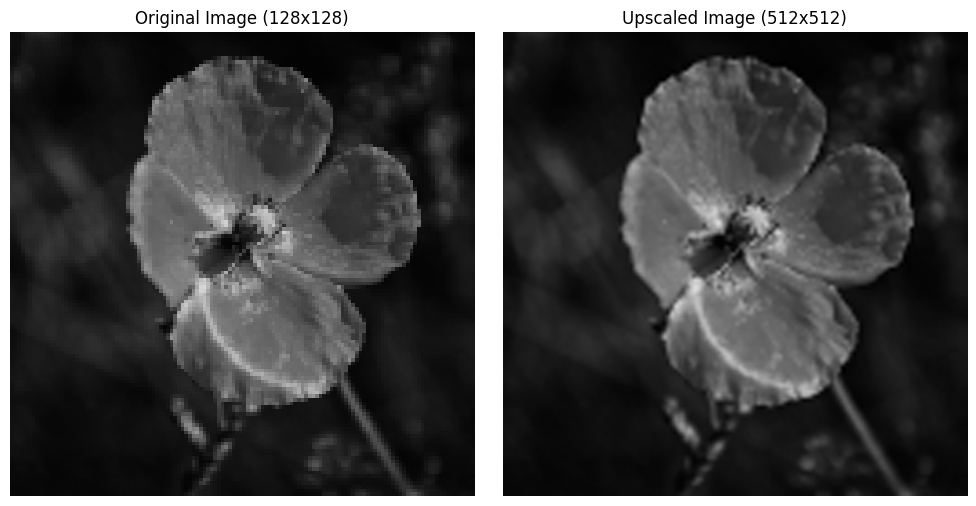

In [40]:
display_both_images(image, scaled_up_image_using_openCV)

In [41]:
print(scaled_up_image_using_openCV.shape)
print(image.shape)

(512, 512, 3)
(128, 128, 3)
